In [1]:
%pip install --upgrade pandas


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta
import requests

In [3]:
dataset=pd.read_csv("Bitstamp_BTCUSD_d.csv")
dataset.isna().values.any()

False

In [4]:
dataset=dataset.drop(['unix','symbol'], axis='columns')
dataset.date=pd.to_datetime(dataset.date, format='%Y-%m-%d %H:%M:%S')
dataset

,date,open,high,low,close,Volume BTC,Volume USD
0,2024-10-07,62831.00,62865.00,62772.00,62861.00,3.798808e+00,2.387969e+05
1,2024-10-06,62057.00,62962.00,61816.00,62814.00,8.467321e+02,5.318663e+07
2,2024-10-05,62080.00,62368.00,61699.00,62063.00,4.496542e+02,2.790689e+07
3,2024-10-04,60747.00,62473.00,60474.00,62081.00,1.394478e+03,8.657059e+07
4,2024-10-03,60627.00,61461.00,59860.00,60745.00,1.412604e+03,8.580861e+07
...,...,...,...,...,...,...,...
3597,2014-12-02,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
3598,2014-12-01,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
3599,2014-11-30,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03
3600,2014-11-29,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03


## DATA PREPARING

In [5]:
X = pd.to_datetime(dataset.iloc[7:28, 0])
y=dataset.iloc[7:28, 4].values

In [6]:
X_pred=pd.to_datetime(dataset.iloc[0:7, 0])

## LINEAR REGRESSION MODEL

In [7]:
regr = LinearRegression()
regr.fit(X.values.reshape(-1, 1), y.reshape(-1, 1))

LinearRegression()

In [8]:
y_predl=regr.predict(X_pred.values.astype(float).reshape(-1, 1))
y_predl=y_predl.flatten()

## POLYNOMIAL REGRESSION MODEL

In [9]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree=5)
X_poly = pol.fit_transform(X.values.reshape(-1, 1))
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y.reshape(-1, 1))

LinearRegression()

In [10]:
y_predp=lin_reg_2.predict(pol.fit_transform(X_pred.values.reshape(-1, 1)))
y_predp=y_predp.flatten()

## SVR MODEL

In [11]:
from sklearn.preprocessing import StandardScaler
sc_y = StandardScaler()
scal_y = sc_y.fit_transform(y.reshape(-1, 1))

In [12]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X.values.reshape(-1, 1), scal_y)

C:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [13]:
y_preds=sc_y.inverse_transform(svr.predict(X_pred.values.reshape(-1,1)).reshape(-1,1)).flatten()

## DECISION TREE

In [14]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state = 52)
tree.fit(X.values.reshape(-1, 1), y.reshape(-1, 1))

DecisionTreeRegressor(random_state=52)

In [15]:
y_predt=tree.predict(X_pred.values.astype(float).reshape(-1, 1)).flatten()

## RANDOM FOREST

In [16]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 10, random_state = 52)
forest.fit(X.values.reshape(-1, 1), y.reshape(-1, 1))

C:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=10, random_state=52)

In [17]:
y_predf=forest.predict(X_pred.values.astype(float).reshape(-1, 1)).flatten()

## VISUALIZATION

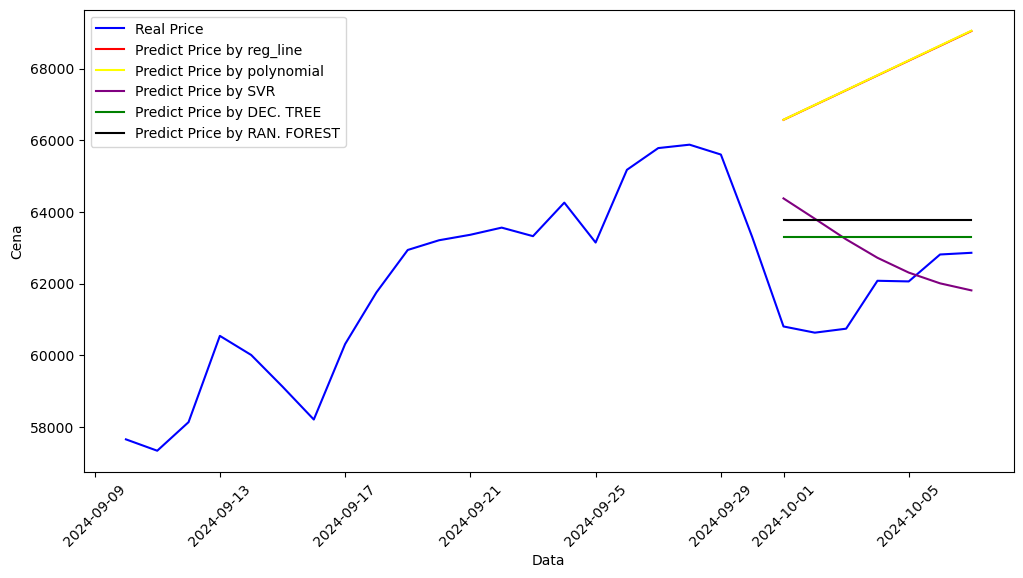

In [20]:
X1 = pd.to_datetime(dataset.iloc[0:28, 0])
y1=dataset.iloc[0:28, 4].values

plt.figure(figsize=(12, 6))

# cz1
sns.lineplot(x=X1, y=y1, color='blue', label='Real Price')

# cz2
sns.lineplot(x=X_pred, y=y_predl, color='red', label='Predict Price by reg_line')

# cz3
sns.lineplot(x=X_pred, y=y_predp, color='yellow', label='Predict Price by polynomial')

# cz3
sns.lineplot(x=X_pred, y=y_preds, color='purple', label='Predict Price by SVR')

# cz4
sns.lineplot(x=X_pred, y=y_predt, color='green', label='Predict Price by DEC. TREE')

# cz5
sns.lineplot(x=X_pred, y=y_predf, color='black', label='Predict Price by RAN. FOREST')

#plt.title('Real Prices')
plt.xlabel('Data')
plt.ylabel('Cena')
plt.xticks(rotation=45)
plt.legend()
plt.show()